# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**

1. Approximately 11% of values will have the first digit 1, and approximately 11% will have the first digit 9. There are 9 numbers (1-9) that can be the first digit (not counting zero because real-life numbers don't usually have a leading zeroe)
2. Approximately 10% for 1, 10% for 9, for same reason as above (expect zero at end does occur)

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `https://raw.githubusercontent.com/dlsun/data-science-book/master/data/sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dlsun/data-science-book/master/data/sp500.csv").set_index('Name')
df

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
ABT,2018-02-01,$61.75,$62.18,8101584
ACN,2018-02-01,$160.16,$160.46,1692576
ADBE,2018-02-01,$199.12,$199.38,2366120
ADI,2018-02-01,$91.25,$91.65,2312175


We are examining stock prices in this experiment, and we are provided the ticker symbol, date, open price, close price, and volume traded on the date (only Feb. 1st in this case). The most natural variable to use as an index for thisdata would be the ticker symbol ("Name" in this case).

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

In [2]:
first_digits = df.volume.astype(str).str[0].value_counts()
first_digits.plot.bar()

My predictions were off, as I had expected the data to be uniformly disctributed amongst digits.
The distribution of first digits has right skew, and there is an inverse relationship between number and how often it occurs.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

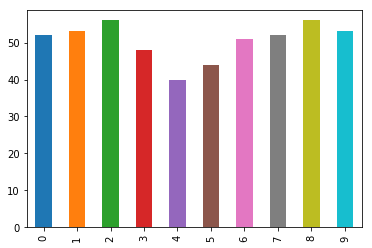

In [3]:
last_digits = df.volume.astype(str).str[-1].value_counts()
last_digits.sort_index(inplace=True)
last_digits.plot.bar()

My prediction was much more on point for this data, as it appears to be roughly uniformly distributed.
The distribution of last digits suggests that digits are no more likely to be one number over another, unlike the first digit distribution.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

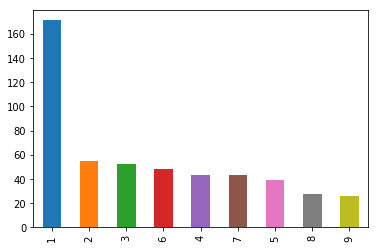

In [4]:
first_digits = df.close.str[1].value_counts()
first_digits.plot.bar()

Pandas infered the closing price as an object, or a string to be more specific (because of the '$' at the beginning). The distribution is similar to the first distribution we visualized, albeit even more right skewed, witha large proportion of digits being '1'.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF [to PolyLearn](https://polylearn.calpoly.edu/AY_2018-2019/mod/assign/view.php?id=297024).